In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('placement.csv') # Load the dataset into a DataFrame

In [3]:
df.head()  # Display the first few rows of the DataFrame

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
# df = df.iloc[:, 1:]  # Display all columns except the first one

In [5]:
df.info()  # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
df.shape  # Display the shape of the DataFrame

(1000, 3)

In [7]:
for col in df.columns:
    print(f"'{col}'")


'cgpa'
'placement_exam_marks'
'placed'


In [8]:
import matplotlib.pyplot as plt


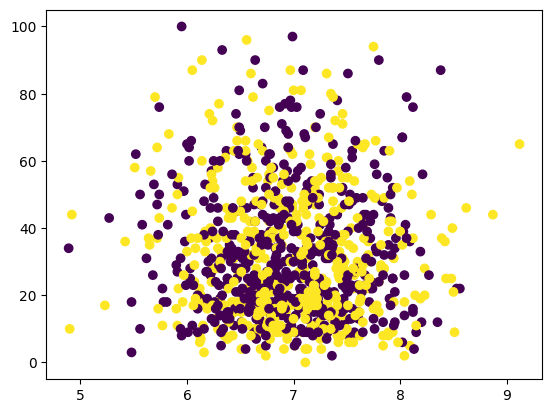

In [9]:
plt.scatter(df['cgpa'], df['placement_exam_marks'], c=df['placed'], cmap='viridis')


In [10]:
print(df.columns)


Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')


In [11]:
X = df.iloc[:, 0:2]  # Select the first two columns as features
Y = df.iloc[:, -1]  # Select the last column as the target variable

In [12]:
X

,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0
...,...,...
995,8.87,44.0
996,9.12,65.0
997,4.89,34.0
998,8.62,46.0


In [13]:
Y

0      1
1      1
2      1
3      1
4      0
      ..
995    1
996    1
997    0
998    1
999    1
Name: placed, Length: 1000, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [15]:
X_train

,cgpa,placement_exam_marks
697,7.23,49.0
44,7.88,55.0
48,6.29,42.0
340,7.45,51.0
318,6.74,60.0
...,...,...
192,6.67,38.0
852,6.54,43.0
788,6.54,19.0
874,6.60,24.0


In [16]:
Y_train

697    1
44     0
48     0
340    0
318    0
      ..
192    0
852    1
788    0
874    0
312    1
Name: placed, Length: 900, dtype: int64

In [17]:
X_test

,cgpa,placement_exam_marks
439,6.67,10.0
685,6.05,87.0
195,6.71,44.0
555,6.46,32.0
766,7.17,34.0
...,...,...
682,6.34,17.0
356,5.91,50.0
256,7.37,48.0
464,6.28,37.0


In [18]:
Y_test

439    1
685    1
195    0
555    0
766    0
      ..
682    1
356    1
256    1
464    1
364    1
Name: placed, Length: 100, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler


In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)  # Fit the scaler to the training data and transform it

In [22]:
X_train

array([[ 0.43285807,  0.91445982],
       [ 1.48724669,  1.23519787],
       [-1.09195009,  0.54026543],
       ...,
       [-0.686416  , -0.68923043],
       [-0.58908782, -0.42194872],
       [ 0.09220944,  1.23519787]], shape=(900, 2))

In [23]:
X_test = scaler.transform(X_test)  # Transform the test data using the fitted scaler

In [24]:
X_test

array([[-0.47553828, -1.17033751],
       [-1.48126281,  2.94580081],
       [-0.41065283,  0.64717811],
       [-0.81618691,  0.00570201],
       [ 0.33552989,  0.11261469],
       [ 1.32503305, -0.79614312],
       [-0.78374418,  1.6628486 ],
       [ 0.20575898,  0.05915835],
       [ 1.42236123, -1.27725019],
       [-0.65397328,  3.42690788],
       [-1.07572872, -0.47540507],
       [-0.0213401 ,  0.59372177],
       [-1.56236962,  1.76976129],
       [ 0.87083488, -1.17033751],
       [-0.31332465,  1.60939226],
       [ 1.21148351, -0.36849238],
       [-0.67019464,  1.60939226],
       [ 0.20575898,  0.00570201],
       [ 0.17331626,  1.3955669 ],
       [-0.88107236,  0.11261469],
       [ 0.30308716, -1.22379385],
       [ 0.75728534, -1.11688117],
       [-0.3782101 , -1.22379385],
       [-0.91351509,  0.70063445],
       [-0.88107236, -0.74268677],
       [-0.32954601, -0.2615797 ],
       [-1.3514919 , -0.63577409],
       [-0.91351509,  0.16607104],
       [ 0.4653008 ,

In [25]:
from sklearn.linear_model import LogisticRegression # Corrected the class name to LogisticRegression

In [26]:
clf = LogisticRegression()  # Initialize the Logistic Regression model

In [27]:
# Model training
clf.fit(X_train, Y_train)  # Fit the model to the training data

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
Y_pred = clf.predict(X_test)  # Make predictions on the test data

In [29]:
Y_test

439    1
685    1
195    0
555    0
766    0
      ..
682    1
356    1
256    1
464    1
364    1
Name: placed, Length: 100, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(Y_test, Y_pred)  # Calculate the accuracy of the model predictions

0.52

In [32]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

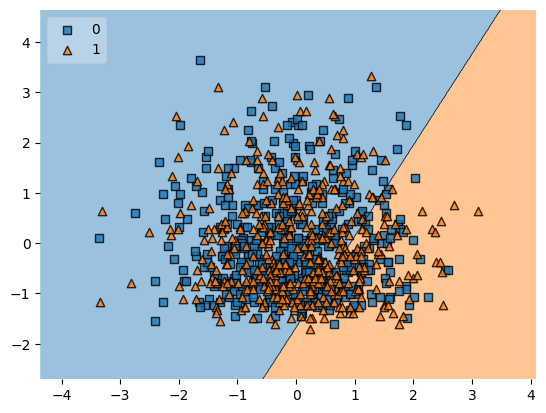

In [33]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [34]:
import pickle

In [35]:
pickle.dump(clf, open('model.pkl', 'wb'))  # Save the trained model to a file